In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
print(df_train.size)
print(df_train.shape)

130632
(10886, 12)


In [4]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df_train.sort_values(by="count", ascending=False).head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.060,44,16.9979,91,886,977
9320,2012-09-11 17:00:00,3,0,1,1,28.70,31.820,28,0.0000,168,802,970
9297,2012-09-10 18:00:00,3,0,1,1,25.42,31.060,35,19.9995,111,857,968
9752,2012-10-10 17:00:00,4,0,1,1,23.78,27.275,43,15.0013,91,857,948
9896,2012-10-16 17:00:00,4,0,1,1,21.32,25.000,39,12.9980,104,839,943


In [7]:
df_train.isnull().any()
# There are no null values

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

[Text(0, 0.0, ''),
 Text(0, 100000.0, '200'),
 Text(0, 200000.0, '400'),
 Text(0, 300000.0, '600'),
 Text(0, 400000.0, '800'),
 Text(0, 500000.0, '1000'),
 Text(0, 600000.0, ''),
 Text(0, 700000.0, '')]

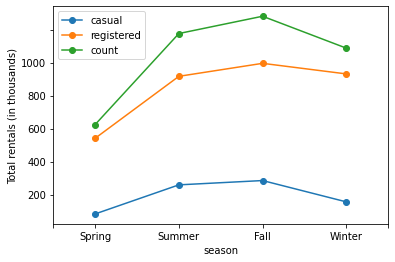

In [8]:
ax_s = df_train.groupby('season')[['casual', 'registered', 'count']].sum().plot(marker='o')
ax_s.set_xticks([0.5, 1, 2, 3, 4, 4.5])
ax_s.set_xticklabels(['', 'Spring', 'Summer', 'Fall', 'Winter', ''])
ax_s.set_ylabel('Total rentals (in thousands)')
ax_s.set_yticklabels(['', '200', '400', '600', '800', '1000', ''])


[Text(0.5, 0, 'temp'),
 Text(1.5, 0, 'atemp'),
 Text(2.5, 0, 'humidity'),
 Text(3.5, 0, 'windspeed'),
 Text(4.5, 0, 'count')]

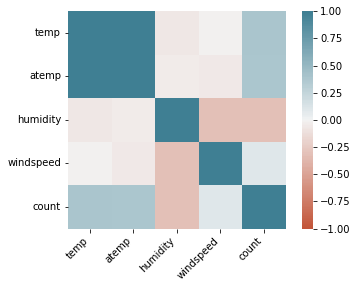

In [9]:
#correlation heat map
df_train_continuous = df_train[['temp', 'atemp', 'humidity', 'windspeed', 'count']]
corr = df_train_continuous.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

<AxesSubplot:>

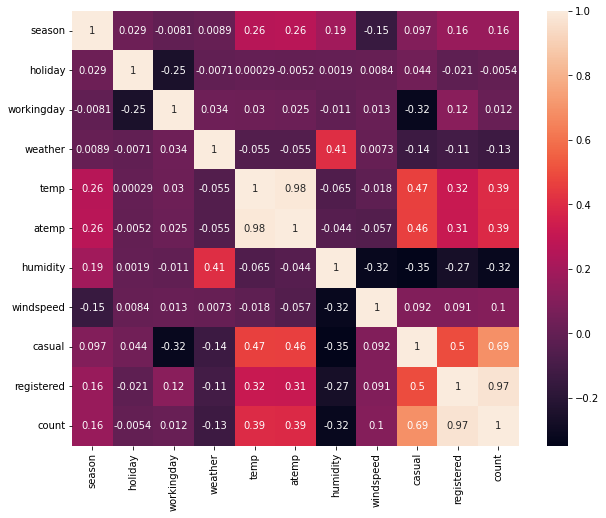

In [10]:
corr = df_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [11]:
pd.DatetimeIndex(df_train['datetime']).year.value_counts()

2012    5464
2011    5422
Name: datetime, dtype: int64

In [12]:
season = df_train.groupby('season')['count'].mean().reset_index()
season.columns = ['Season', 'Count']
season['Season'] = ['Spring', 'Summer', 'Fall', 'Winter']
season

,Season,Count
0,Spring,116.343261
1,Summer,215.251372
2,Fall,234.417124
3,Winter,198.988296


<AxesSubplot:xlabel='Season', ylabel='Count'>

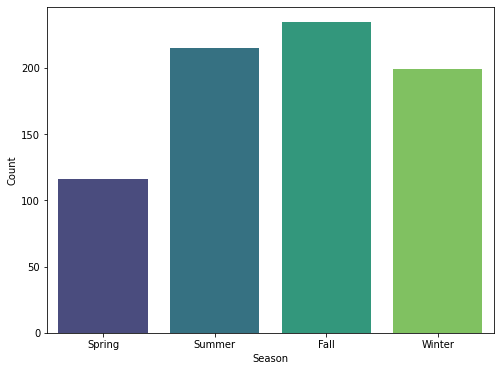

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(season['Season'], season['Count'], palette='viridis')

In [14]:
df_train['weather'].unique()
# 1. Clear, 2- Mist, 3- Light Snow, 4- Heavy Rain

array([1, 2, 3, 4])

In [15]:
weather = df_train.groupby('weather')['count'].sum().reset_index()
weather.columns = ['Weather', 'Count']
weather['Weather'] = ['Clear', 'Mist', 'Light Snow', 'Heavy Rain']
weather

,Weather,Count
0,Clear,1476063
1,Mist,507160
2,Light Snow,102089
3,Heavy Rain,164


<AxesSubplot:xlabel='Weather', ylabel='Count'>

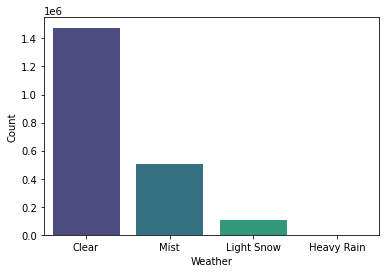

In [16]:
sns.barplot(weather['Weather'], weather['Count'], palette='viridis')

<AxesSubplot:xlabel='weather', ylabel='season'>

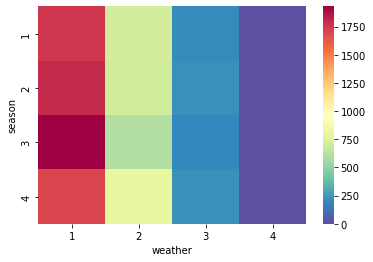

In [17]:
sns.heatmap(pd.crosstab(index=df_train['season'], columns=df_train['weather']), cmap='Spectral_r')

Text(0, 0.5, 'Count of Bikes rented')

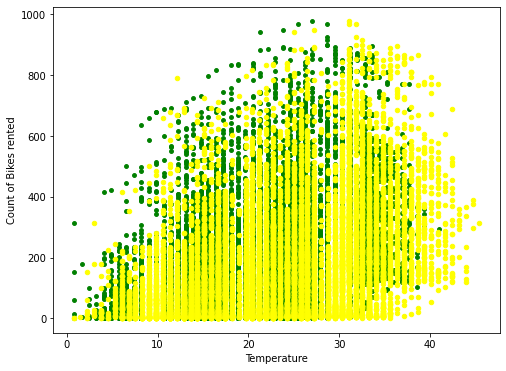

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df_train['temp'], df_train['count'], color='green', s=15)
plt.scatter(df_train['atemp'], df_train['count'], color='yellow', s=20)
plt.xlabel("Temperature")
plt.ylabel("Count of Bikes rented")
# temp and atemp is highly related so we can drop atemp column to avoid redundancy

In [19]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_train['day'] = pd.DatetimeIndex(df_train['datetime']).day
df_train['month'] = pd.DatetimeIndex(df_train['datetime']).month
df_train['year'] = pd.DatetimeIndex(df_train['datetime']).year
df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,12,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,12,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,19,12,2012


In [20]:

# x = df[['season', 'holiday' , 'workingday' , 'weather' , 'temp' , 'atemp' , 'humidity' , 'windspeed']]
# y = df[['casual' , 'registered' , 'count']]
train_set, test_set = train_test_split(df_train, test_size=0.2, random_state=0)
x_train = train_set[['year' , 'month' ,'season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']]
y_train = train_set['count']
x_test = test_set[['year' , 'month' ,'season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']]
y_test = test_set['count']
print("size of train set : ", len(train_set))
print("size of test set : ", len(test_set))


size of train set :  8708
size of test set :  2178


In [21]:
linr = LinearRegression()
dtr = DecisionTreeRegressor()
br = BaggingRegressor()
etr = ExtraTreesRegressor(n_estimators=10)
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor(n_estimators=10)
knnr = KNeighborsRegressor()
models = {'linr': linr, 'dtr': dtr, 'br': br, 'etr': etr, 'gbr': gbr, 'rfr': rfr, 'knnr': knnr}

In [22]:
pred = pd.DataFrame(columns=['linr', 'dtr', 'br', 'etr', 'gbr', 'rfr', 'knnr'])
mad = {'linr': 0, 'dtr': 0, 'br': 0, 'etr': 0, 'gbr': 0, 'rfr': 0, 'knnr': 0}
for clt in models.keys():
    model = models[clt]
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    pred[clt] = prediction
    mad[clt] = model.score(x_train, y_train) * 100
#     model.score(x_train, y_train) * 100

In [23]:
print(mad)

{'linr': 30.558844420294662, 'dtr': 95.89603195066164, 'br': 86.35323787574183, 'etr': 95.89603195066164, 'gbr': 42.36872986022245, 'rfr': 86.22020413827134, 'knnr': 50.89490241132948}


In [24]:

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_predict = dtr.predict(x_test)
score = dtr.score(x_train, y_train)
print(score)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)
test_set['prediction'] = y_predict
test_set


0.9589603195066163
(2178, 8)
(2178,)
(8708, 8)
(8708,)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,prediction
6638,2012-03-13 21:00:00,1,0,1,1,23.78,27.275,56,7.0015,44,200,244,13,3,2012,417.0
7975,2012-06-12 16:00:00,2,0,1,2,27.06,29.545,89,19.0012,30,209,239,12,6,2012,681.0
5915,2012-02-02 16:00:00,1,0,1,1,18.86,22.725,55,19.0012,18,211,229,2,2,2012,215.0
8050,2012-06-15 19:00:00,2,0,1,1,28.70,31.820,42,11.0014,98,369,467,15,6,2012,339.0
5894,2012-02-01 19:00:00,1,0,1,1,22.14,25.760,52,19.0012,20,315,335,1,2,2012,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,2012-12-17 19:00:00,4,0,1,2,17.22,21.210,88,8.9981,7,333,340,17,12,2012,87.0
5519,2012-01-05 02:00:00,1,0,1,1,8.20,11.365,51,6.0032,0,4,4,5,1,2012,5.0
8217,2012-07-03 18:00:00,3,0,1,2,35.26,37.120,30,0.0000,85,542,627,3,7,2012,210.0
5916,2012-02-02 17:00:00,1,0,1,1,17.22,21.210,54,32.9975,13,437,450,2,2,2012,66.0


In [25]:
test_set['correct_result'] = test_set['count'].equals(test_set['prediction'])
test_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,prediction,correct_result
6638,2012-03-13 21:00:00,1,0,1,1,23.78,27.275,56,7.0015,44,200,244,13,3,2012,417.0,False
7975,2012-06-12 16:00:00,2,0,1,2,27.06,29.545,89,19.0012,30,209,239,12,6,2012,681.0,False
5915,2012-02-02 16:00:00,1,0,1,1,18.86,22.725,55,19.0012,18,211,229,2,2,2012,215.0,False
8050,2012-06-15 19:00:00,2,0,1,1,28.70,31.820,42,11.0014,98,369,467,15,6,2012,339.0,False
5894,2012-02-01 19:00:00,1,0,1,1,22.14,25.760,52,19.0012,20,315,335,1,2,2012,260.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,2012-12-17 19:00:00,4,0,1,2,17.22,21.210,88,8.9981,7,333,340,17,12,2012,87.0,False
5519,2012-01-05 02:00:00,1,0,1,1,8.20,11.365,51,6.0032,0,4,4,5,1,2012,5.0,False
8217,2012-07-03 18:00:00,3,0,1,2,35.26,37.120,30,0.0000,85,542,627,3,7,2012,210.0,False
5916,2012-02-02 17:00:00,1,0,1,1,17.22,21.210,54,32.9975,13,437,450,2,2,2012,66.0,False


Text(0.5, 1.0, 'Residual Plot')

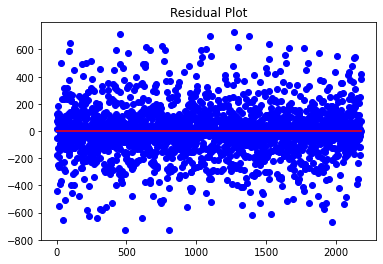

In [26]:
x=[i for i in range(1,len(y_predict)+1)]
plt.scatter(x,(y_test-y_predict),color='blue')
plt.plot(x,[0]*len(y_predict),c='r')
plt.title("Residual Plot")

In [27]:
test_set['Diff'] = (test_set['prediction'] - test_set['count'])
test_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,prediction,correct_result,Diff
6638,2012-03-13 21:00:00,1,0,1,1,23.78,27.275,56,7.0015,44,200,244,13,3,2012,417.0,False,173.0
7975,2012-06-12 16:00:00,2,0,1,2,27.06,29.545,89,19.0012,30,209,239,12,6,2012,681.0,False,442.0
5915,2012-02-02 16:00:00,1,0,1,1,18.86,22.725,55,19.0012,18,211,229,2,2,2012,215.0,False,-14.0
8050,2012-06-15 19:00:00,2,0,1,1,28.70,31.820,42,11.0014,98,369,467,15,6,2012,339.0,False,-128.0
5894,2012-02-01 19:00:00,1,0,1,1,22.14,25.760,52,19.0012,20,315,335,1,2,2012,260.0,False,-75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,2012-12-17 19:00:00,4,0,1,2,17.22,21.210,88,8.9981,7,333,340,17,12,2012,87.0,False,-253.0
5519,2012-01-05 02:00:00,1,0,1,1,8.20,11.365,51,6.0032,0,4,4,5,1,2012,5.0,False,1.0
8217,2012-07-03 18:00:00,3,0,1,2,35.26,37.120,30,0.0000,85,542,627,3,7,2012,210.0,False,-417.0
5916,2012-02-02 17:00:00,1,0,1,1,17.22,21.210,54,32.9975,13,437,450,2,2,2012,66.0,False,-384.0


In [28]:
mean = test_set['count'].mean()
mae = (test_set['count'] - test_set['prediction']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")


mean:  194.44719926538107
mae: 123.47961760461762
mae/mean ratio:  63.502903652570964 %
correctness:  36.497096347429036 %


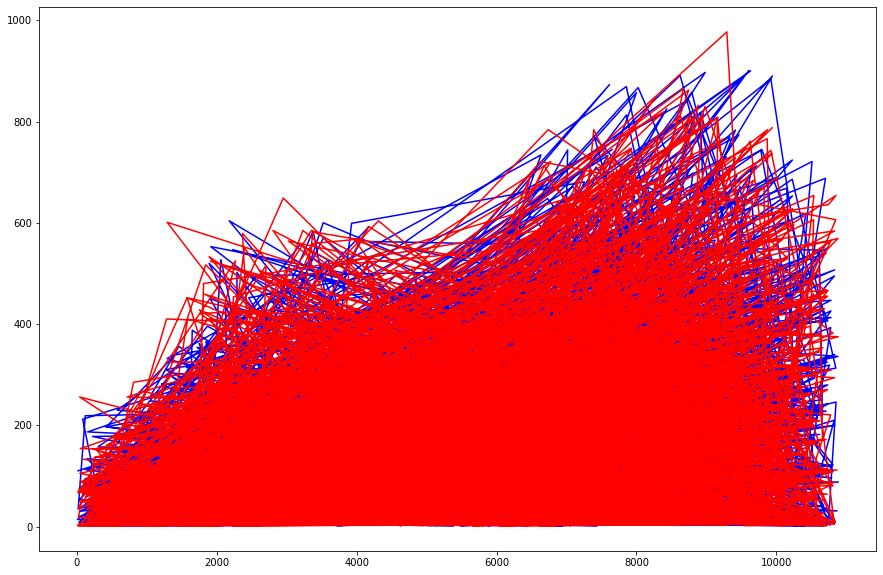

In [29]:
plt.figure(figsize=(15,10))
plt.plot(test_set['count'], color='blue')
plt.plot(test_set['prediction'], color='red')
plt.show()

In [30]:
# Get prediction for our original set
df_test = pd.read_csv("test.csv")
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test['day'] = pd.DatetimeIndex(df_test['datetime']).day
df_test['month'] = pd.DatetimeIndex(df_test['datetime']).month
df_test['year'] = pd.DatetimeIndex(df_test['datetime']).year
x_train = df_train[['year' , 'month' ,'season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']]
y_train = df_train['count']
x_test = df_test[['year' , 'month' ,'season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']]
print("size of train set : ", len(df_train))
print("size of test set : ", len(df_test))


size of train set :  10886
size of test set :  6493


In [31]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_predict = dtr.predict(x_test)
df_test['prediction'] = y_predict
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,month,year,prediction
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,20,1,2011,148.0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,2011,63.0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,2011,63.0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1,2011,76.0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,1,2011,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,31,12,2012,369.0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,31,12,2012,369.0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,31,12,2012,363.0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,31,12,2012,226.0
